# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

In [5]:
df.info()  #To show the number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [6]:
df.nunique()  #The number of unique users

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [7]:
(df['converted'].mean())

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
df.query('(group=="treatment" and landing_page !="new_page") or (group == "control" and landing_page == "new_page")')['user_id'].count()

3893

**f.** Do any of the rows have missing values?

In [9]:
df.isnull().sum() #To check for missing value

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df.query('(group=="treatment" and landing_page!="new_page") or (group=="control" and landing_page=="new_page")').index)

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.duplicated('user_id', keep=False) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [14]:
User_id_repeat =df2[df2.user_id.duplicated()]
#print(User_id_repeat)
User_id_repeat

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

# Check again if the row with a duplicate user_id is deleted or not
df2.drop(df.index[2893], axis =0, inplace=True)

In [16]:
df2.user_id.duplicated().sum()

0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [17]:
(df2['converted'].mean())

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
(df2.query("group=='control'")['converted'].mean())

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
(df2.query("group=='treatment'")['converted'].mean())

0.11880806551510564

In [21]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = (df2.query("group=='control'")['converted'].mean()) - (df2.query("group=='treatment'")['converted'].mean())
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [22]:
(df2.query("landing_page == 'new_page'").user_id.count() /df2.shape[0])

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**

>From the results obtained above
>Total conversion rate is 0.1196 (11.96%)
>Control conversion (old page): 0.1204  (12.04%)
>Treatment conversion (new page): 0.1188 (11.88%)

> We can say that there is no suufficient evidence to come the conclusion that the new page would lead to mre conversion. The difference is small. Hence, more testing need to be carried out.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<center>
$H_{0}$: $p_{new}$ - $p_{old}$ $\leq$ $0$ 
<center>     
$H_{1}$: $p_{new}$ - $p_{old}$ $>$ $0$
  
> In words,

> Null hypothesis: The old page is better

> Alternative hypothesis: The new page is better
    


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [23]:
p_new = (df2['converted'].mean())
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [24]:
p_old = (df2['converted'].mean())
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [25]:
n_new = df2.query("landing_page =='new_page'").shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = df2.query("landing_page =='old_page'").shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [27]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11940678549308376

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [28]:
# Simulate a Sample for the control Group
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11971860071313518

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [29]:
sim_diff = new_page_converted.mean() - old_page_converted.mean()
sim_diff.mean()

-0.00031181522005142848


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [30]:
# Simulate sampling distribution under null hypothesis
p_diffs = []

for _ in range(10000):
    # Simulate conversions for new and old pages
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    
    # Calculate difference in conversion rates and append to list
    p_diff = (new_page_converted / n_new) - (old_page_converted / n_old)
    p_diffs.append(p_diff)


In [31]:
#convert to numpy array
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

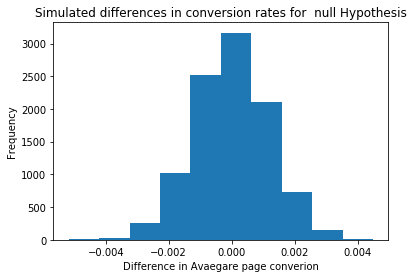

In [32]:
plt.hist(p_diffs)
plt.title("Simulated differences in conversion rates for  null Hypothesis")
plt.xlabel("Difference in Avaegare page converion")
plt.ylabel("Frequency");

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [33]:
new_actual_conv=df2.query('landing_page =="new_page"')['converted'].mean()
old_actual_conv=df2.query('landing_page =="old_page"')['converted'].mean()
obs_diff = new_actual_conv - old_actual_conv
obs_diff

-0.0015782389853555567

In [34]:
p_diffs = np.array(p_diffs)
# Calculate lower and upper bounds of confidence interval
lower, upper = np.percentile(p_diffs, 0.5), np.percentile(p_diffs, 99.5)

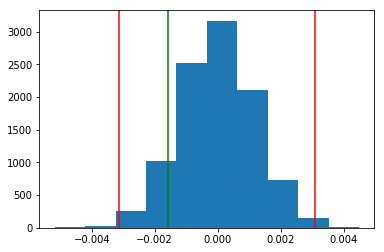

In [35]:
plt.hist(p_diffs)
plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')
plt.axvline(obs_diff, color='green');

In [36]:
print("The actual observed difference is:", obs_diff)

The actual observed difference is: -0.00157823898536


In [37]:
#Proportion of p_diffs greater than the obsered difference in ab_data.csv
print("Proportion of p_diffs greater than the observed difference is:", (p_diffs > obs_diff).mean())

Proportion of p_diffs greater than the observed difference is: 0.9099


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

> Looking at above gotten distribution, it is observed that green line is more than half of the distribution which indicates that our observed statistic falls within this range. This can make us to conclude that the null hypothesis which is  the old page converts $\geq$ the new page.

> In statistics, the p-value is a measure of the strength of evidence against the null hypothesis. It represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming the null hypothesis is true.

>Typically, we compare the p-value to a pre-determined significance level (alpha), such as 0.05 or 0.01. If the p-value is less than or equal to the significance level, we reject the null hypothesis and conclude that there is sufficient evidence to suggest that the alternative hypothesis is true (i.e., there is a real effect). If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to support the alternative hypothesis.

> Type I error is when we decide that the new page is better, but actuatlly the old page is better.

> Type II error is when we decide that the old page is better, but actually the new page is better

> Type I threshold 0.05

> if p value $\leq 0.05$ then there is a strong evidence against the null, we can reject the null hypothesis

>But if  p value $>0.05$ then there is a weak evidence against the null hypothesis, hence, we accept the null hypothesis.

> From our computed value for **P- value** our result showed a large value of **0.9099**, meaning that there is no enough or sufficient evedence against the null hypothesis. Using a better scientific term, we do not have a statistical evidence that tells that the new page converts better.

> As a result, we accept the null hypothesis and continue with the old page.





**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [38]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('group =="control"')['converted'].sum()

# number of conversions with the new_page
convert_new = df2.query('group =="treatment"')['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"').shape[0]
# number of individuals who received new_page
n_new =  df2.query('landing_page == "new_page"').shape[0]


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
(convert_old, convert_new, n_old, n_new)

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.





Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [55]:
import statsmodels.api as sm
#Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old,n_new], alternative ='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [41]:
from scipy.stats import norm
# This shows us how significant our z-score is
print(norm.cdf(z_score))

#Tells us what our critical value at 95% confidence
print(norm.ppf(1-(0.05/2)))

0.905058312759
1.95996398454


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



> From the above result obtained, we got a Z-score of aproximatly **1.31** and this does not go beyong the critital value of **1.95996398454**.

> The implication of this, is that the z-score and p-value agrees with our discoveries in questions J and K. There is therefore no difference in the conversions of each page and we cannot reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**It is a logistic regression**

> Becuase Logistic regression is used to make a prediction about the relationship between categorical dependent variables and predictors.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [42]:
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2['intercept']= 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,old_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [43]:
import statsmodels.api as sm

logit =sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results= logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:               8.077e-06
Time:                        23:37:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
1/np.exp(-0.0150)

1.0151130646157189

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

> From the result obtained for ab_page, we got a p-value of **0.190** which is larger than the type I error rate of **0.05**. This informs us that the landing page is not statistically significant in predicting whether the viewers converts or not.
> In part II we looked at one tailed test but this is a two tailed test. They are both different.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> If I was going to add any other factor, it would definitely be timestamp to check the max and the min time for conversion to take place. However, it is better to keep ones analyis simple in order not to ccomplicate the model and making it difficult to interprete the findings.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [46]:
# Read the countries.csv
df_countries =pd.read_csv('./countries.csv')
df_merge= df_countries.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_merge.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [47]:
# Join with the df2 dataframe
df_countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [48]:
# Create the necessary dummy variables
df_merge[['CA','UK','US']] =pd.get_dummies(df_merge['country'])
df_merge.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [49]:
# Fit your model, and summarize the results
logit_2=sm.Logit(df_merge['converted'], df_merge[['intercept', 'CA', 'US']])
result=logit_2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:               1.521e-05
Time:                        23:38:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [67]:
1/np.exp(-0.0507), np.exp(0.0099)

(1.0520072437650141, 1.0099491671175422)

> It is very obvious from the above obtained result that our p-values are greater thn the type I error threshold of **0.05**. This suggests that the new factor country does not have any significant impact on conversion.

> However, I would stll like to check for interaction between page and country in order to check if there is significant imoact on conversion.

In [50]:
df_merge['CA_page']= df_merge['ab_page']*df_merge['CA']
df_merge['US_page']= df_merge['ab_page']*df_merge['US']
df_merge.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US,CA_page,US_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0


In [53]:
# Fit a logit regression model for the interraction between new page and countries using dummy variables and summarize the results
logit_3=sm.Logit(df_merge['converted'], df_merge[['intercept','ab_page', 'CA', 'US', 'CA_page', 'US_page']])
result=logit_3.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:               3.482e-05
Time:                        23:50:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA_page       -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_page       -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

In [54]:
1/np.exp(0.0108),1/np.exp(-0.0118),1/np.exp(0.0057),1/np.exp(-0.0783),1/np.exp(-0.0314)

(0.98925811061364821,
 1.011869894648401,
 0.9943162141784333,
 1.0814470441230692,
 1.0318981806179213)

> For every unit decrease in ab_page, we have 0.99% conversion rate, holding all other variables constant.

> For every unit decrease in CA, conversion is 1.01%  more likely to take place than UK, holding all other variables constant.

> For every unit decrease in US, conversion is 0.99%  more likely to take place than UK, holding all other variables constant.

> For every unit decrease in CA_page, conversion is 1.08%  more likely to take place for CA new page users than UK, holding all other variables constant.

> For every unit decrease in US_page, conversion is 1.03%  more likely to take place for US new page users than UK, holding all other variables constant.

> The obtained results have shown clearly that the interraction between page and country has no effect on the conversion rate becuase all our $p-values$ are larger than the type I error rate with threshold of $0.05$.

> Based on these facts, we can conclude that we do not have any statiscally sufficient evidence to suggest that  the new page has more conversion rate than the old.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0